In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,func,desc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii_sqlite.db")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [3]:
Measurements = Base.classes.measurements
Stations=Base.classes.stations

In [4]:
session = Session(engine)

In [5]:
dates = ['2017-01-18','2017-01-22']

In [6]:
latest_date=session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(latest_date)

(datetime.date(2017, 8, 23),)


In [7]:
query_date=dt.datetime(2017,8,23)-dt.timedelta(days=365)
measure = session.query(Measurements).filter(Measurements.date >= query_date)

dte=session.query(Measurements.date).filter(Measurements.date >= query_date)
date_list = [r[0] for r in dte]
prcp=session.query(Measurements.precipitation_tenths_of_mm).filter(Measurements.date >= query_date)
prcp_list = [r[0] for r in prcp]


In [8]:
prcp_df = pd.DataFrame({"Date":date_list, "Precipitation":prcp_list})
prcp_df.set_index('Date')

grouped_df=prcp_df.groupby(["Date"])
grouped_dates = grouped_df["Precipitation"].mean()

prcp_grouped=pd.DataFrame({"Precipitation":grouped_dates})
prcp_grouped.head()

prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


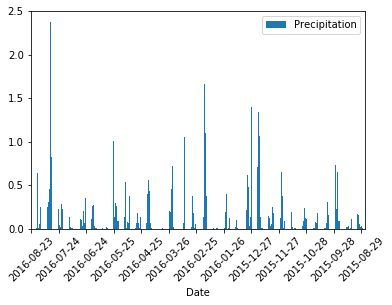

In [9]:
a = query_date
dateList = []
for x in np.arange(0,365,30):
    x=float(x) #Datetime does not accept integers
    if x == 0:
        dateList.append(str(a.date()))
    else:
        dateList.append(str((a - dt.timedelta(days = x)).date()))


bar=prcp_grouped.plot(kind="bar")
bar.set_xticks(np.arange(0,365,30))
bar.set_xticklabels(dateList, rotation=45)

plt.show()

In [15]:
station_count=session.query(Stations.name).count()
print(f'Total number of weather stations: {station_count}')

Total number of weather stations: 9


In [11]:
session.query(Measurements.station, func.count(Measurements.temp_observed)).\
    group_by(Measurements.station).order_by(desc(func.count(Measurements.temp_observed))).all()


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [12]:
query_date=dt.datetime(2017,8,23)-dt.timedelta(days=365)

most_active_station=session.query(Measurements.station).\
    group_by(Measurements.station).order_by(desc(func.count(Measurements.temp_observed))).first()[0]

print(f'The most active station is {most_active_station}.')

The most active station is USC00519281.


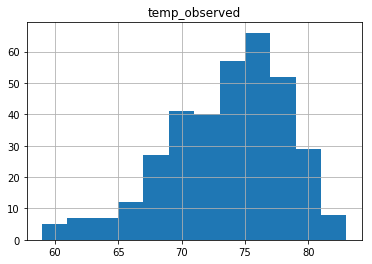

In [13]:
#* Design a query to retrieve the last 12 months of temperature observation data (tobs).
  #* Filter by the station with the highest number of observations.
  #* Plot the results as a histogram with `bins=12`.
  #<center><img src='images/temp_hist.png' height="400px" /></center>

query_results=session.query(Measurements.date,Measurements.temp_observed).filter(Measurements.date >= query_date). \
                                                                filter(Measurements.station == most_active_station).all()
temp_df=pd.DataFrame(query_results)

temp_df.hist(bins=12)
plt.show()

   min  max        avg
0   61   77  68.826087


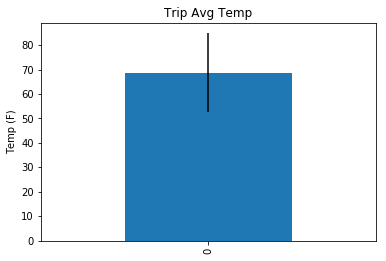

In [14]:
start_date=dt.datetime(2016,1,18)
end_date=dt.datetime(2016,1,22)

def calc_temps(start_date,end_date):
    query_results=session.query(func.min(Measurements.temp_observed).label("min"),
                                func.max(Measurements.temp_observed).label("max"),
                                func.avg(Measurements.temp_observed).label("avg")). \
                                filter(Measurements.date >= start_date). \
                                filter(Measurements.date <= end_date).all()
        
    temp_df=pd.DataFrame(query_results)
    return temp_df

my_data=calc_temps(start_date,end_date)

print(my_data)

my_plot=my_data["avg"].plot(kind="bar",yerr=my_data["max"]-my_data["min"],title="Trip Avg Temp")
my_plot.set_ylabel("Temp (F)")
plt.show()